In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score

In [2]:
def plot_feature_importance(model, X_train, figsize=(12, 6)):
    sns.set_style('darkgrid')
    
    # Plot feature importance
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=figsize)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

In [3]:
train = pd.read_csv('PJT002_train.csv')
val = pd.read_csv('PJT002_validation.csv')
test = pd.read_csv('PJT002_test.csv')
sub = pd.read_csv('PJT002_submission.csv')

C:\Users\possi\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train.shape

(59199, 180)

In [5]:
val.shape

(6898, 180)

In [6]:
val.columns.values

array(['dt_of_fr', 'bldng_us', 'bldng_archtctr', 'bldng_cnt', 'bldng_ar',
       'ttl_ar', 'lnd_ar', 'dt_of_athrztn', 'ttl_grnd_flr', 'ttl_dwn_flr',
       'bldng_us_clssfctn', 'tmprtr', 'prcpttn', 'wnd_spd', 'wnd_drctn',
       'hmdt', 'gas_engry_us_201401', 'ele_engry_us_201401',
       'gas_engry_us_201402', 'ele_engry_us_201402',
       'gas_engry_us_201403', 'ele_engry_us_201403',
       'gas_engry_us_201404', 'ele_engry_us_201404',
       'gas_engry_us_201405', 'ele_engry_us_201405',
       'gas_engry_us_201406', 'ele_engry_us_201406',
       'gas_engry_us_201407', 'ele_engry_us_201407',
       'gas_engry_us_201408', 'ele_engry_us_201408',
       'gas_engry_us_201409', 'ele_engry_us_201409',
       'gas_engry_us_201410', 'ele_engry_us_201410',
       'gas_engry_us_201411', 'ele_engry_us_201411',
       'gas_engry_us_201412', 'ele_engry_us_201412',
       'gas_engry_us_201501', 'ele_engry_us_201501',
       'gas_engry_us_201502', 'ele_engry_us_201502',
       'gas_engry_us_201503'

In [7]:
train.columns.values

array(['dt_of_fr', 'fr_yn', 'bldng_us', 'bldng_archtctr', 'bldng_cnt',
       'bldng_ar', 'ttl_ar', 'lnd_ar', 'dt_of_athrztn', 'ttl_grnd_flr',
       'ttl_dwn_flr', 'bldng_us_clssfctn', 'tmprtr', 'prcpttn', 'wnd_spd',
       'wnd_drctn', 'hmdt', 'gas_engry_us_201401', 'ele_engry_us_201401',
       'gas_engry_us_201402', 'ele_engry_us_201402',
       'gas_engry_us_201403', 'ele_engry_us_201403',
       'gas_engry_us_201404', 'ele_engry_us_201404',
       'gas_engry_us_201405', 'ele_engry_us_201405',
       'gas_engry_us_201406', 'ele_engry_us_201406',
       'gas_engry_us_201407', 'ele_engry_us_201407',
       'gas_engry_us_201408', 'ele_engry_us_201408',
       'gas_engry_us_201409', 'ele_engry_us_201409',
       'gas_engry_us_201410', 'ele_engry_us_201410',
       'gas_engry_us_201411', 'ele_engry_us_201411',
       'gas_engry_us_201412', 'ele_engry_us_201412',
       'gas_engry_us_201501', 'ele_engry_us_201501',
       'gas_engry_us_201502', 'ele_engry_us_201502',
       'gas_engry_u

In [8]:
list(train.columns.values) == list(val.columns.values)

False

In [9]:
train.isna().sum()

dt_of_fr                            0
fr_yn                               0
bldng_us                        27677
bldng_archtctr                  27665
bldng_cnt                           0
bldng_ar                            0
ttl_ar                              0
lnd_ar                              0
dt_of_athrztn                   27581
ttl_grnd_flr                    10210
ttl_dwn_flr                     11005
bldng_us_clssfctn               29343
tmprtr                             13
prcpttn                         53629
wnd_spd                            33
wnd_drctn                         221
hmdt                               22
gas_engry_us_201401             27581
ele_engry_us_201401             27581
gas_engry_us_201402             27581
ele_engry_us_201402             27581
gas_engry_us_201403             27581
ele_engry_us_201403             27581
gas_engry_us_201404             27581
ele_engry_us_201404             27581
gas_engry_us_201405             27581
ele_engry_us

In [10]:
train.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59199 entries, 0 to 59198
Data columns (total 180 columns):
dt_of_fr                        object
fr_yn                           object
bldng_us                        object
bldng_archtctr                  object
bldng_cnt                       int64
bldng_ar                        float64
ttl_ar                          float64
lnd_ar                          float64
dt_of_athrztn                   object
ttl_grnd_flr                    float64
ttl_dwn_flr                     float64
bldng_us_clssfctn               object
tmprtr                          float64
prcpttn                         float64
wnd_spd                         float64
wnd_drctn                       float64
hmdt                            float64
gas_engry_us_201401             float64
ele_engry_us_201401             float64
gas_engry_us_201402             float64
ele_engry_us_201402             float64
gas_engry_us_201403             float64
ele_engry_us_20140

In [11]:
train['fr_yn'] 

0        Y
1        N
2        Y
3        N
4        N
5        Y
6        N
7        N
8        N
9        N
10       Y
11       N
12       Y
13       N
14       Y
15       N
16       Y
17       N
18       Y
19       N
20       Y
21       N
22       N
23       N
24       N
25       N
26       N
27       N
28       N
29       N
        ..
59169    Y
59170    Y
59171    N
59172    Y
59173    Y
59174    N
59175    N
59176    N
59177    Y
59178    Y
59179    N
59180    N
59181    Y
59182    Y
59183    N
59184    N
59185    Y
59186    N
59187    N
59188    N
59189    Y
59190    N
59191    N
59192    N
59193    N
59194    N
59195    N
59196    N
59197    N
59198    N
Name: fr_yn, Length: 59199, dtype: object

In [12]:
binary_y = {'N': 0, 'Y': 1}

train['fr_yn'] = train['fr_yn'].map(binary_y)
val['fr_yn'] = val['fr_yn'].map(binary_y)

In [13]:
X_train = train.drop(['fr_yn', 'dt_of_fr'], 1)
y_train = train['fr_yn']
X_val = val.drop(['fr_yn', 'dt_of_fr'], 1)
y_val = val['fr_yn']
test = test.drop(['dt_of_fr'], 1)

In [14]:
y_train

0        1
1        0
2        1
3        0
4        0
5        1
6        0
7        0
8        0
9        0
10       1
11       0
12       1
13       0
14       1
15       0
16       1
17       0
18       1
19       0
20       1
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
59169    1
59170    1
59171    0
59172    1
59173    1
59174    0
59175    0
59176    0
59177    1
59178    1
59179    0
59180    0
59181    1
59182    1
59183    0
59184    0
59185    1
59186    0
59187    0
59188    0
59189    1
59190    0
59191    0
59192    0
59193    0
59194    0
59195    0
59196    0
59197    0
59198    0
Name: fr_yn, Length: 59199, dtype: int64

In [15]:
df_all = pd.concat([X_train, X_val, test])

categorical_cols = df_all.select_dtypes(['object']).columns
for col in categorical_cols:
    df_all[col] = pd.Categorical(df_all[col]).codes

X_train = df_all[:len(train)]
X_val = df_all[len(train):-len(test)]
test = df_all[-len(test):]

C:\Users\possi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [16]:
X_train = X_train.fillna(-1)
y_train = y_train.fillna(-1)
X_val = X_val.fillna(-1)
test = test.fillna(-1)

In [23]:
X_train.head()

,ahsm_dstnc,bldng_ar,bldng_ar_prc,bldng_archtctr,bldng_cnt,bldng_cnt_in_50m,bldng_us,bldng_us_clssfctn,blk_dngrs_thng_mnfctr_yn,cctv_dstnc,...,slf_fr_brgd_yn,tbc_rtl_str_dstnc,tmprtr,trgt_crtr,ttl_ar,ttl_dwn_flr,ttl_grnd_flr,us_yn,wnd_drctn,wnd_spd
0,11322,69.42,-1.0,8,3,0,9,6,-1,112,...,-1,1891,10.7,-1,69.42,0.0,1.0,-1,200.0,0.9
1,3369,46.29,122581.0,-1,3,0,-1,-1,-1,818,...,-1,4533,19.5,-1,46.29,0.0,1.0,-1,20.0,0.5
2,12451,583.80,618105.0,15,1,14,1,6,-1,165,...,-1,277,15.5,-1,2516.76,0.0,5.0,-1,90.0,2.0
3,407,48.92,719542.0,10,2,11,9,6,-1,131,...,-1,438,20.6,-1,48.92,0.0,1.0,-1,0.0,0.4
4,12487,0.00,-1.0,-1,2,0,-1,-1,-1,686,...,-1,1702,12.7,-1,0.00,-1.0,-1.0,-1,360.0,0.6


In [17]:
X_train.info(True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59199 entries, 0 to 59198
Data columns (total 179 columns):
ahsm_dstnc                      int64
bldng_ar                        float64
bldng_ar_prc                    float64
bldng_archtctr                  int8
bldng_cnt                       int64
bldng_cnt_in_50m                int64
bldng_us                        int8
bldng_us_clssfctn               int8
blk_dngrs_thng_mnfctr_yn        int8
cctv_dstnc                      int64
cctv_in_100m                    int64
cltrl_hrtg_yn                   int8
dngrs_thng_yn                   int8
dt_of_athrztn                   int16
ele_engry_us_201401             float64
ele_engry_us_201402             float64
ele_engry_us_201403             float64
ele_engry_us_201404             float64
ele_engry_us_201405             float64
ele_engry_us_201406             float64
ele_engry_us_201407             float64
ele_engry_us_201408             float64
ele_engry_us_201409             float64


In [18]:
from  sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

f1_score(y_val, y_pred)

0.49501661129568103

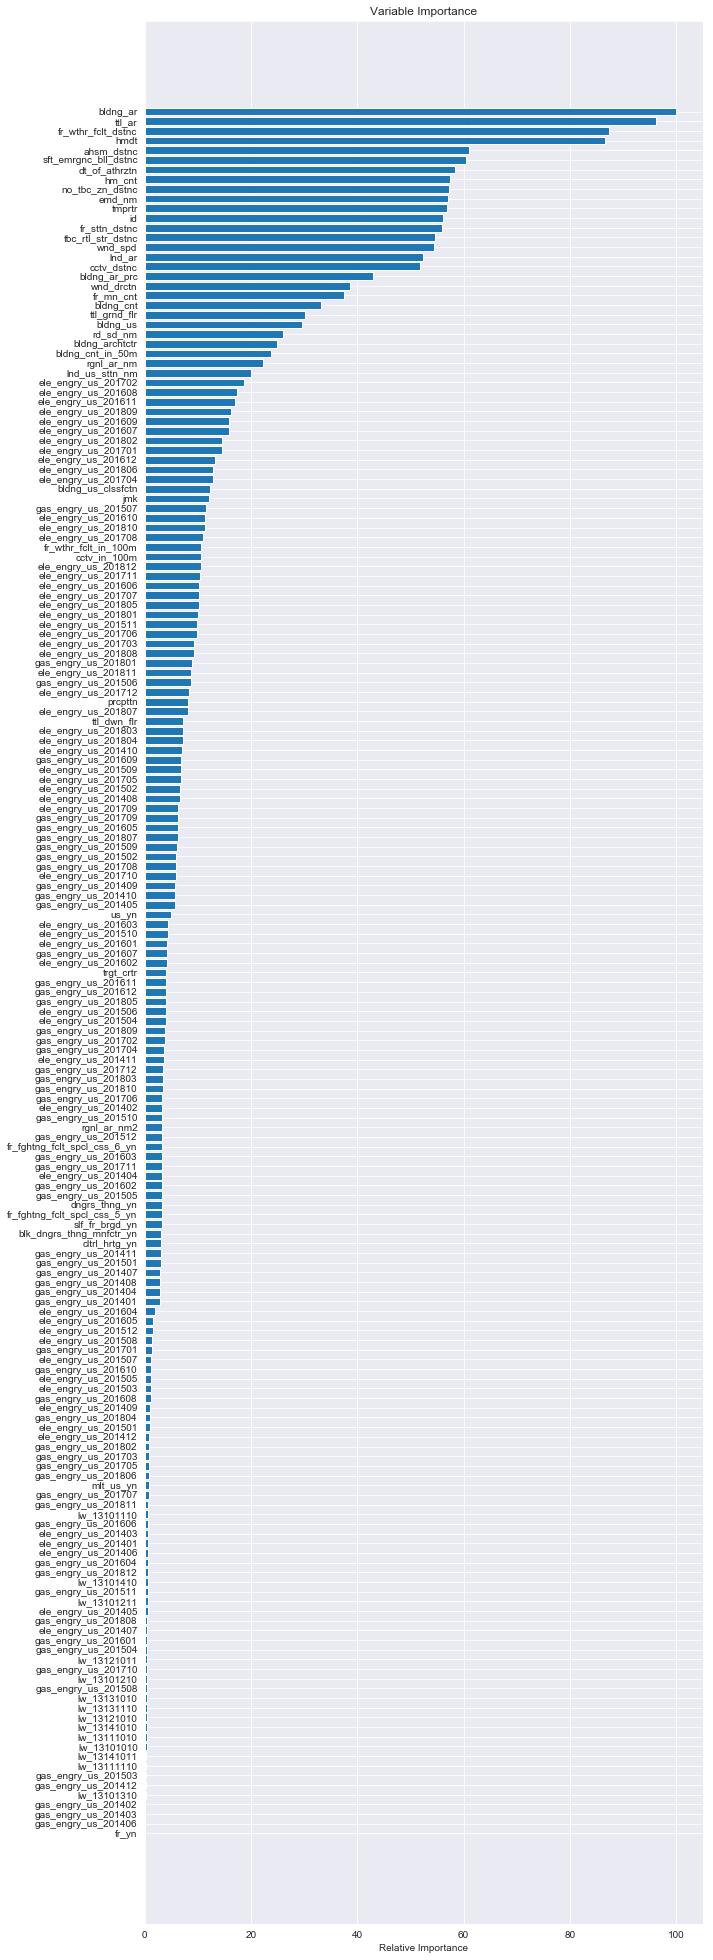

In [19]:
plot_feature_importance(model, X_train, (10, 35))

In [20]:
y = model.predict(test)

In [21]:
sub['fr_yn'] = y
sub['fr_yn'] = sub['fr_yn'].map({0:'N', 1:'Y'})
sub.head()

,fr_yn
0,N
1,N
2,N
3,N
4,N


In [22]:
sub.to_csv('baseline_rf.csv', index=False)